* from WADI_14days.csv to WADI_normaldata.csv: remove first 4 lines to be read by pandas

In [1]:
import pandas as pd

In [2]:
def csv_remove_description():
    # for ../data/WADI/WADI_14days.csv
    file_name = "../data/WADI/WADI_14days.csv"
    file_output_name = "../data/WADI/WADI_normaldata.csv"
    if(file_name == "" or file_name == None):
        return
    
    data = None
    with open(file_name, "r") as f:
        data = f.readlines()

    print("total lines: ", len(data))
    # view the first lines of the data
    for i in range(7):
        print(data[i])
    with open(file_output_name, "w") as f: 
        for i in range(4, len(data)):
            f.write(data[i]+"\n")

In [1]:
def save_sensor_map():
    sensor_map = {}
    with open("../data/WADI/WADI_normaldata.csv", "r") as f:
        columns = f.readline().split(",")[3:]
        
        for i in range(len(columns)):
            if(i not in [47, 48, 83, 84]):
                sensor_map[columns[i]] = "sensor"+str(i)
            else:
                print(columns[i])
   
    sensor_map['\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\TOTAL_CONS_REQUIRED_FLOW'] = "sensor126"
    with open("../data/WADI/sensor_map.txt", "w") as f:
        f.write(str(sensor_map))

In [6]:
def load_sensor_map():
    with open("../data/WADI/sensor_map.txt", "r") as  f:
        return json.loads(f.read().replace("'", '"'))

In [2]:
save_sensor_map()

\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_LS_001_AL
\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_LS_002_AL
\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_P_001_STATUS
\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2_P_002_STATUS


In [3]:
import numpy as np

In [4]:
import json

In [7]:
sensor_map = load_sensor_map()

In [5]:
sensor_map["\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\2B_AIT_003_PV"]

'sensor107'

In [29]:
normal_data = np.load("../data/WADI/normal1.0.npy")
anomaly_data = np.load("../data/WADI/anomaly1.0.npy")
np.save("../data/WADI/normal2.0.npy", normal_data[:, [i for i in range(normal_data.shape[1]) if i!=(106-4)]] )
np.save( "../data/WADI/anomaly2.0.npy", anomaly_data[:, [i for i in range(anomaly_data.shape[1]) if i!=(106-4)]])

In [1]:
import pandas as pd

In [14]:
pd.Series(anomaly_data[:,103]).describe()

count    172801.000000
mean          0.430046
std           0.229723
min           0.000000
25%           0.268794
50%           0.405858
75%           0.615087
max           1.000000
dtype: float64

In [2]:
df = pd.read_csv("../data/WADI/WADI_attackdata_labelled.csv")

In [16]:
df["\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\2B_AIT_003_PV"].describe()

count    172801.000000
mean          8.609684
std           0.053415
min           8.509690
25%           8.572190
50%           8.604060
75%           8.652710
max           8.742210
Name: \\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2B_AIT_003_PV, dtype: float64

In [18]:
for i in range(len(df.columns[4:-1])):
    #print(i)
    col = df.columns[i+4]
    #print(col)
    if(df[col].max()>7000):
        print("col: ", col, ", ", i)
        print(df[col].max())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
col:  \\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\2B_AIT_002_PV ,  106
8128.0
107
108
109
110
col:  \\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_AIT_002_PV ,  110
8279.1
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126


In [20]:
import matplotlib.pyplot as plt

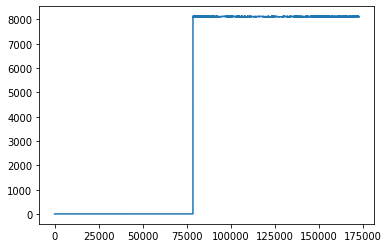

In [28]:
plt.plot(range(172801),df["\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\2B_AIT_002_PV"].to_numpy())

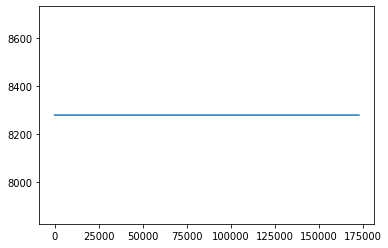

In [22]:
plt.plot(range(172801),df["\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\3_AIT_002_PV"].to_numpy())

In [23]:
df["\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\3_AIT_002_PV"].describe()

count    1.728010e+05
mean     8.279100e+03
std      5.456984e-12
min      8.279100e+03
25%      8.279100e+03
50%      8.279100e+03
75%      8.279100e+03
max      8.279100e+03
Name: \\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_AIT_002_PV, dtype: float64